# Proyecto 7

Este proyecto analiza datos de transporte urbano en Chicago para comprender los patrones de viaje, preferencias de usuarios y factores que influyen en la duración de los viajes. Utilizando conjuntos de datos detallados sobre empresas de taxis, viajes, condiciones climáticas y barrios, exploramos tendencias como las compañías de taxis más populares, los destinos de viaje comunes y el impacto del clima en la movilidad urbana. Nuestro objetivo es extraer insights valiosos que beneficien a empresas de transporte, planificadores urbanos y residentes.

## Índice

1. [Importación de dataframes](#importación-de-dataframes)
2. [Validación de los 10 principales barrios en términos de finalización](#validación-de-los-10-principales-barrios-en-términos-de-finalización)
3. [Pruebas de hipótesis](#pruebas-de-hipótesis)

## Importación de dataframes

Se importan las librerias necesarias para trabajar con los dataframes 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
df_company = pd.read_csv("/datasets/project_sql_result_01.csv")
df_dropoff = pd.read_csv("/datasets/project_sql_result_04.csv")
df_trips_info = pd.read_csv("/datasets/project_sql_result_07.csv")

In [3]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [5]:
df_company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [6]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
df_dropoff.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [8]:
df_dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Se convierte la columna de average_trips a enteros para facilitar la interpretación y reducir la complejidad del análisis

In [9]:
df_dropoff['average_trips'] = df_dropoff['average_trips'].astype(int)

In [10]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
df_trips_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
df_trips_info.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [13]:
df_trips_info['duration_seconds'] = df_trips_info['duration_seconds'].astype(int)

In [14]:
df_trips_info['start_ts'] = pd.to_datetime(df_trips_info['start_ts'], format='%Y-%m-%d %H:%M:%S')

Se realiza el cambio de tipo a entero de la columna duration_seconds y se cambia el tipo de la columna start_ts al tipo datetime para poder trabajar con las fechas

## Validación de los 10 principales barrios en términos de finalización

In [15]:
top_10_locations = df_dropoff.sort_values(by='average_trips', ascending=False).head(10)

In [16]:
top_10_locations

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


Se valida que la locación que tiene más viajes es loop 

### Número de viajes por empresa de taxis

In [17]:
df_company[:10]

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


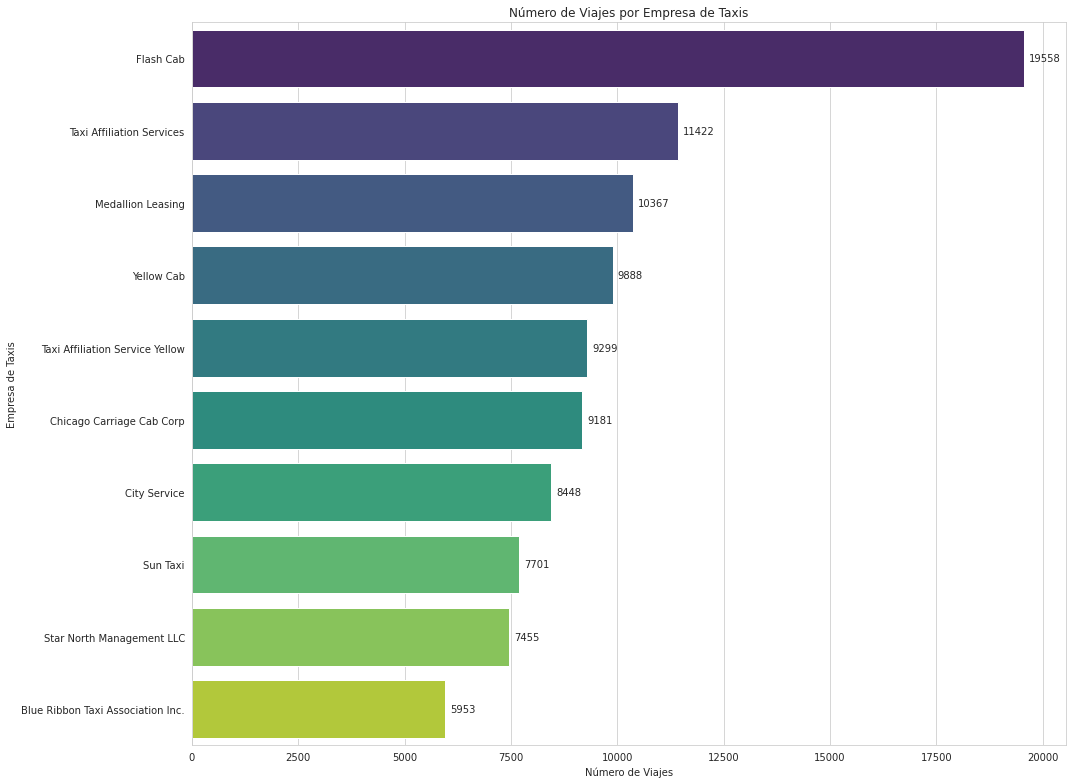

In [18]:
# Gráfico de empresas de taxis y número de viajes

sns.set_style("whitegrid")

plt.figure(figsize=(15, 11))
ax = sns.barplot(x='trips_amount', y='company_name', data=df_company[:10], palette='viridis')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa de Taxis')
plt.title('Número de Viajes por Empresa de Taxis')

# Añadir etiquetas de valor en cada barra
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.tight_layout()  # Ajustar diseño para evitar recorte de etiquetas
plt.show() 

Los usuarios prefieren la compañía de Flash Cab, esto puede ser por cuestiones como diferencia en la atención por parte de los conductores, el tiempo que les toma a los usuarios llegar a su destino o incluso el costo de viaje.

### 10 principales barrios por finalización

In [19]:
top_10_locations

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


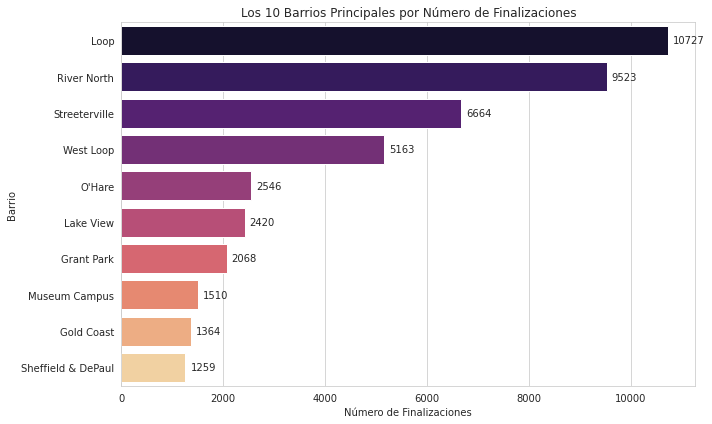

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_locations, palette='magma')
plt.xlabel('Número de Finalizaciones')
plt.ylabel('Barrio')
plt.title('Los 10 Barrios Principales por Número de Finalizaciones')

# Añadir etiquetas de valor en cada barra
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')
plt.tight_layout()  # Ajustar diseño para evitar recorte de etiquetas
plt.show()

Los usuarios tienden a viajar más al barrio de Loop, se puede suponer que la mayoría de usuarios viven dentro de esa zona o puede ser un lugar demasiado concurrido lo cual provoca que su demanda sea alta.

## Pruebas de hipótesis

Se desea probar la hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos.

Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos.

In [21]:
df_trips_info.head(6)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
5,2017-11-11 04:00:00,Good,1320


In [22]:
df_bad_weather = df_trips_info[df_trips_info['weather_conditions'] == 'Bad']['duration_seconds']

In [28]:
df_bad_weather.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

In [24]:
df_good_weather = df_trips_info[df_trips_info['weather_conditions'] == 'Good']['duration_seconds']

In [26]:
df_good_weather.describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Se realiza la división de la información para poder trabajar con los viajes en días lluviosos y en los días que tienen un buen clima.
De acuerdo a la información mostrada se puede ver que existen menor cantidad de viajes cuando hay clima lluvioso e incluso la duración promedio de los viajes durante un mal clima tiende a ser más alto a diferecia de los climas buenos.

In [29]:
t_stat, p_value = ttest_ind(df_good_weather, df_bad_weather)

alpha = 0.5

print(f"""
La duración promedio de los viajes durante clima lluvioso es de: {df_bad_weather.mean()}
La duración promedio de los viajes durante clima bueno es de: {df_good_weather.mean()}
""")

print(f'Test statistic: {t_stat}')
print(f'p-value: {p_value}')
print("")
if p_value < alpha:
    print('Rechazamos la hipótesis nula: Hay evidencia suficiente para decir que la duración promedio de los viajes varía en los sábados lluviosos.')
else:
    print('No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que la duración promedio de los viajes varía en los sábados lluviosos.')


La duración promedio de los viajes durante clima lluvioso es de: 2427.2055555555557
La duración promedio de los viajes durante clima bueno es de: 1999.6756756756756

Test statistic: -6.946177714041499
p-value: 6.517970327099473e-12

Rechazamos la hipótesis nula: Hay evidencia suficiente para decir que la duración promedio de los viajes varía en los sábados lluviosos.


Se utiliza la prueba t para poder validar si la diferencia entre las medias de ambas poblaciones es significativa, esto para rechazar o no la hipotesis propuesta previamente.
Se establece un valor alpha de 0.5 

### Conclusiones 


- Flash Cab lidera en preferencia, lo que sugiere que los usuarios pueden encontrar aspectos positivos en su servicio, como conductores amigables, tiempos de espera cortos o precios competitivos. Esto puede ser un indicativo de su buena reputación en el mercado de los taxis.

- El hecho de que el barrio de Loop sea el destino más común indica una alta demanda de servicios de transporte en esa área. Esto puede atribuirse a su naturaleza comercial, con oficinas, tiendas y restaurantes, así como a su atractivo turístico. Los residentes y visitantes que se desplazan hacia y desde este barrio pueden contribuir significativamente al número total de viajes en taxi.

- La variación en la duración de los viajes los sábados lluviosos sugiere que las condiciones climáticas adversas tienen un impacto significativo en la movilidad urbana. Los días lluviosos pueden aumentar el tráfico y dificultar la navegación, lo que resulta en tiempos de viaje más largos.